

*   Write a Python code to implement Linear Regression for multi-dimensional input and one-dimensional output using Matrix Inverse. You can use NumPy to do matrix inverse, but you are encouraged to write your own code for this task also.

*   Verify your results using the scikit-learn Linear Regression package.

*   Write a code to minimise the squared error function using Gradient Descent, and compare the results with the above methods.
*   Find the best fit hyperplane for the four synthetic datasets attached. Two of them will directly give good results with the usual Linear Regression algo, one of them will require a non-linear transformation of the input features, and for one of them the standard Linear Regression algo is not suitable. You need to figure out which of the 4 datasets belongs to which of these categories, with proper reasoning.




Submission Deadline : Jan 27, 2024 (Saturday)

Submission Form : https://forms.gle/bLDU3WY1P82Uer6H6





**Data Set - 1**

In [9]:
# importing the required module and packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import plotly.express as px

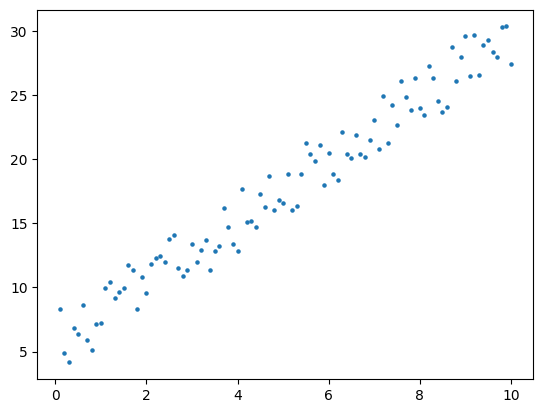

In [10]:
# reading the csv file using pandas
df = pd.read_csv("Data1.csv")

# "X" and "Y" are the list of all xi and yi respectively.
x_value = [float(item) for item in list(df['x'])]
y_value = [float(item) for item in list(df['y'])]

# Graphical Visualisation of data using plotely
plt.scatter(x_value, y_value, s=5)
plt.show()

In [11]:
# Evaluating the required parameter using loop,numpy
xy_value=[]
x_square_value=[]
for i in range(100):
  q = x_value[i] * y_value[i]
  xy_value.append(q)

  p = x_value[i] ** 2
  x_square_value.append(p)

avg_y_value = np.mean(y_value)
avg_x_square_value = np.mean(x_square_value)
avg_xy_value = np.mean(xy_value)
avg_x_value = np.mean(x_value)


In [12]:
# Evaluating the slope and constant
slope = (avg_xy_value - avg_x_value * avg_y_value)/(avg_x_square_value - avg_x_value ** 2)
const = (avg_y_value - slope * avg_x_value)
print("value of slope :", slope)
print("value of constant :", const)

value of slope : 2.384060066057183
value of constant : 5.680787126761226


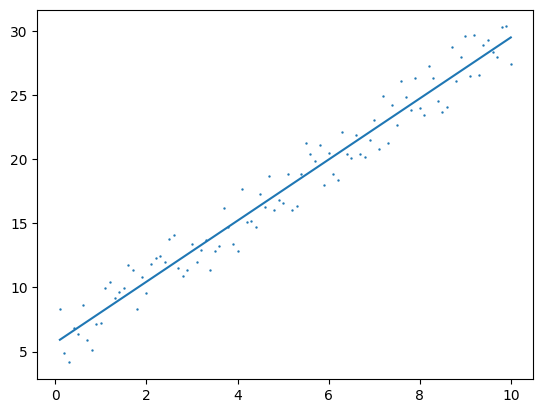

In [13]:
# prediction using own developed regression model
predicted_y_value = []
for i in range(100):
  r = slope* x_value[i] + const
  predicted_y_value.append(r)
#plotting graph; Given data set is scatter but predicted dataset is in the form of line.
plt.scatter(x_value, y_value, s = 0.5,)
plt.plot(x_value, predicted_y_value)

In [14]:
# applying linear Regression which is build by SkLearn.
regr = LinearRegression()
x_array = np.array(x_value).reshape(-1, 1)
y_array = np.array(y_value).reshape(-1, 1)
regr.fit(x_array,y_array)
print("Slope: ",regr.coef_)
print("Intercept: ",regr.intercept_)

Slope:  [[2.38406007]]
Intercept:  [5.68078713]


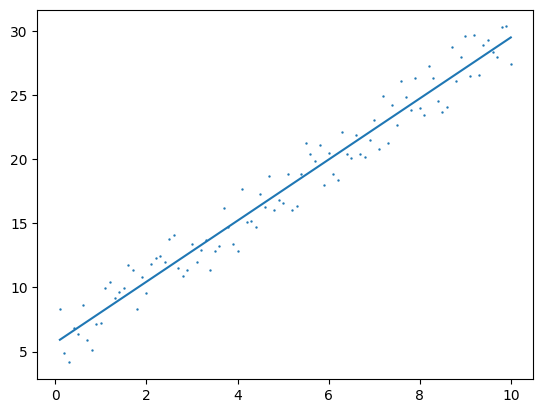

In [15]:
# predicting the value of every data using SKLearn.
y_pred_array = regr.predict(x_array)
y_pred_list = list(y_pred_array)
plt.scatter(x_value, y_value, s = 0.5)
plt.plot(x_value, y_pred_array)

# plt.tick_params(left = False, bottom = False)
plt.show()

**Verification Of My own LinearRegession Model Relative To SK  Learn Model**

In [18]:
# Error between "prediction by My SKLearn Regression model" and "given data."
mae = mean_absolute_error(y_true = y_value,y_pred = y_pred_array )
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_value,y_pred = y_pred_list) #default=True
rmse = mean_squared_error(y_true=y_value,y_pred = y_pred_list,squared=False)
r_square = r2_score(y_value, y_pred_array)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("r_sqare :",r_square)


MAE: 1.280555978429147
MSE: 2.078525401777328
RMSE: 1.4417091945941551
r_sqare : 0.9579571905586357


In [19]:
# Error between "prediction by My Own Regression model" and "given data."
mae = mean_absolute_error(y_true = y_value,y_pred = predicted_y_value )
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_value,y_pred = predicted_y_value) #default=True
rmse = mean_squared_error(y_true=y_value,y_pred = predicted_y_value,squared=False)
r_square = r2_score(y_value, predicted_y_value)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("r_sqare :",r_square)

MAE: 1.2805559784291467
MSE: 2.0785254017773265
RMSE: 1.4417091945941547
r_sqare : 0.9579571905586358
